In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston.data
Y=boston.target
X.shape

(506, 13)

In [3]:
import pandas as pd
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['target']=pd.Series(boston.target)

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
features=df[['CRIM','RM','LSTAT']]
features.describe()

,CRIM,RM,LSTAT
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063
std,8.601545,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.677083,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [6]:
target=df['target']
split_num=int(len(features)*0.7)
X_train=features[:split_num]
Y_train=target[:split_num]

X_test=features[split_num:]
Y_test=target[split_num:]

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.coef_, model.intercept_


(array([ 0.69979497, 10.13564218, -0.20532653]), -38.000969889690325)

In [18]:
preds=model.predict(X_test)
preds

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

In [19]:
import numpy as np
def mae_value(y_ture,y_pred):
    n=len(y_ture)
    mae=sum(np.abs(y_ture-y_pred))/n
    return mae
    

In [20]:
def mse_value(y_ture,y_pred):
    n=len(y_ture)
    mse=sum((y_ture-y_pred)**2)/n
    return mse

In [22]:
mae=mae_value(Y_test.values,preds)
mse=mse_value(Y_test.values,preds)
print("mae:",mae)
print("mse",mse)

mae: 13.068102215563261
mse 305.18764325315004


In [43]:
from sklearn.model_selection import learning_curve
import numpy as np
def plot_learning_curve(plt,estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color="g")
    plt.plot(train_sizes,train_scores_mean,"o--",color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,"o-",color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

    

<module 'matplotlib.pyplot' from '/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

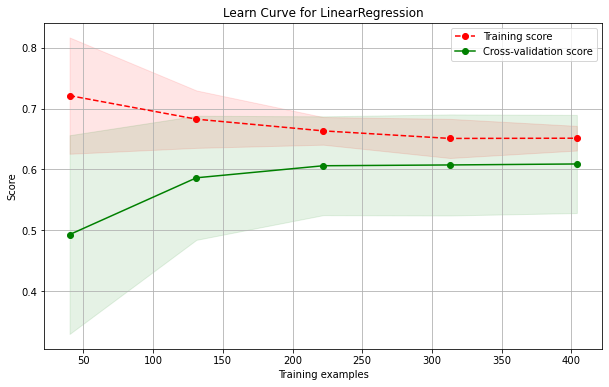

In [44]:
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(10,6))
plot_learning_curve(plt,model,"Learn Curve for LinearRegression",features,target,ylim=None,cv=cv)